In [ ]:
#Communication

In [ ]:
import scipy.stats as stats
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.integrate import quad
from scipy.integrate import simps
import math
sns.set()


    
#def f(n,l):   #Boltzmandistribution function is defined:its working fine\n",
    #try:
        #v=np.sqrt((l**2/n**2)-((2*q*deltaV)/m))
        #vdash=pow(l,2)/(v*pow(n,3))
    #except ZeroDivisionError:
        #v = float('Inf') 
        #vdash = float('Inf')
        
    #fn= (8.20639e-13)*pow(2.71828,(((491.347)-(1.22837e18)*n)*n))
    
   # mu=2.314e-9
    #sgma=6.38e-10
    
    
    
    #fn=(np.exp((-(n-mu)**2)/(2*sgma**2)))/((2*np.pi*sgma**2)**0.5)
    #return fn
def f(n,l):   #Boltzmandistribution function is defined:its working fine\n",

    v=l/n
    vdash=l/pow(n,2)
    
    fn= math.sqrt(m/(2.*np.pi*kB*T))*vdash* np.exp((-m*(v-vf)**2)/(2.*kB*T))
    return fn
       
    
#def f(n,l):
    #t=np.linspace(n,0.008,1000000)
    #try:
        #v=l/t
        #vdash=l/pow(t,2)
    #except ZeroDivisionError:
        #v = float('Inf') 
        #vdash = float('Inf')
    
    #ftt= (m/(2.*np.pi*kB*T))**0.5*vdash* np.exp((-m*(v-vf)**2)/(2.*kB*T))
    
    #d=t[1]-t[0]
    #deltat=np.zeros(t.size)
    #deltat[0:(t.size+1)]=d
    #fi=sum(ftt*deltat)
    #return fi

def lostprob(releasetime,arrivaltime1,l):  #function to calculate lost or late probability\n",
    I,err=quad(f,releasetime,arrivaltime1,args=(l,))     
    pl=1-I #pl = 1-integral(f(n-releasetime))\n",
    #I= f(arrivaltime,l)
    return pl
    
def pygivenx(N,x,y,pl):

    if y>(N*x):
        nchosek =0
    else:
        nchosek = (math.factorial(N*x)/(math.factorial((N*x)-y)*math.factorial(y)))
    if pl==0:
        pygivenx=0
    else:
        pygivenx = nchosek*pow(pl,((N*x)-y))*pow((1-pl),y)
    return pygivenx

def py(N,x,y,pl):
    temp = np.zeros(x+1)
    x=x+1
    M= x
    for i in range(x):
        temp[i]= pygivenx(N,i,y,pl)
    py= (1/M) *(sum(temp)) 
    return py
def hygivenx(N,x,y,pl):
    tempyx=np.zeros(y)
    tempx=np.zeros(x+1)
    M= x+1
    px=1/M
    for i in range(x+1):
        for j in range(y):
            pyx=pygivenx(N,i,j,pl)
            if pyx==0:
                tempyx[j]=0
            else:
                tempyx[j]=pyx*(np.log2(1/pygivenx(N,i,j,pl)))
                tempx[i] = px*sum(tempyx)  
    hygivenx=sum(tempx)    
    return hygivenx

def hy(N,x,y,pl):
    tempy = np.zeros(y)
    for i in range(y):
        pyy=py(N,x,i,pl)
        if pyy==0:
            tempy[i]=0
        else:
            tempy[i]=py(N,x,i,pl)*(np.log2(1/py(N,x,i,pl)))
    hy = sum(tempy) 
    return hy
def capacity(N,x,y,pl):
    c=hy(N,x,y,pl)-hygivenx(N,x,y,pl)
    return c

In [ ]:
m = 100*1.660538921e-27                                   #consider hydrogen ion\n",
T = 298                                               #temperature\n",
kB = 1.3806503e-23                                      #Boltzman constant \n",
#length= np.linspace(1,3,3)#array of length\n",
l=3

deltaV=0.5
q=1.67e-19
vfsq=((2*q)*(deltaV))/m 
vf=np.sqrt(vfsq)

releasetime=0                                         #time at which ion is released                           \n",
tsteps=40

    #arrivaltime=np.linspace(0.005,0.8,tsteps)
    #arrivaltime=np.linspace(0.001,0.04,tsteps)       #different arrival times for ion to arrive at receiver \n",
#arrivaltime=np.linspace(1.5e-10,1e-9,100)
arrivaltime=np.linspace(0.00005,0.00006,1000)
    
fig,(ax1) = plt.subplots(dpi=100)

ax1.set_xlabel("time")
ax1.set_ylabel("inforate")
    #ax2.set_xlabel(\"time\")
    #ax2.set_ylabel(\"mutualinfo\")
N=1
x=1
y=2
k=arrivaltime.size                         #k is total number of intervals taken\n",
    #px=0.5
cap=np.zeros(k)                            #array of mutualinfo for each time interval\n",
inforate=np.zeros(k)

#for l in length:
for i in range(k):
    pt=lostprob(releasetime,arrivaltime[i],l)
    if(arrivaltime[i]==0):
        
        cap[i]=0
    else:     
        cap[i]= capacity(N,x,y,pt)
        inforate[i]=cap[i]/arrivaltime[i]
    #ax2.plot(arrivaltime,cap,label='length='+str(l)) 
ax1.plot(arrivaltime,inforate,label='length='+str(l))
plt.legend() 

# Simulation with different voltages and mass

In [ ]:
import math
Tu0sdata=np.zeros((1000,2))
math.sqrt((2*(1.44196e-20))/(78*1.66e-27))

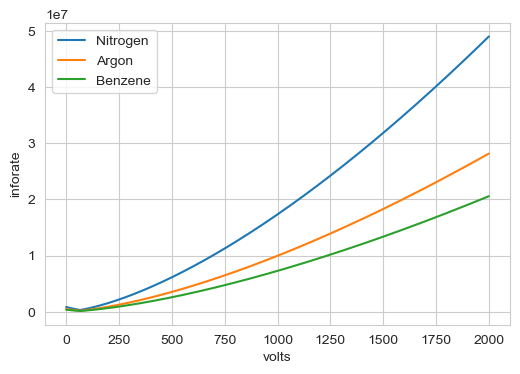

In [11]:
import scipy.stats as stats

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.integrate import quad
from scipy.integrate import simps
import math
from scipy.stats import truncnorm

def get_truncated_normal(mean=0, sd=1, low=0, upp=10):
    return truncnorm((low - mean) / sd, (upp - mean) / sd, loc=mean, scale=sd)

sns.set_style("whitegrid")
fig,ax=plt.subplots(dpi=100)
ax.set_xlabel("volts")
ax.set_ylabel("inforate")

t=np.linspace(1.2e-5,1.4e-5,1000)
volt2=np.linspace(0,2000,1000)
width=np.zeros(volt2.size)
meen=np.zeros(volt2.size)
datarate=np.zeros(volt2.size)
mass=np.array([14,40,78])
elements=np.array(["Nitrogen","Argon","Benzene"])

T=300
kB = 1.3806503e-23
l=0.632
s=0.0116
d=0.01
xolimit=s
R=8.314
ei=0
for mi in mass:
    m = mi*1.66e-27
    md=mi



    sgmav=math.sqrt((kB*T)/m)
    sgmax=319e-6
    vavg=math.sqrt((kB*8*T)/((np.pi)*m))

    v0=np.random.normal(0,sgmav,1000)
    xotr=get_truncated_normal(mean=xolimit/2, sd=sgmax, low=0, upp=0.0116)
    xo = xotr.rvs(1000)
#xo=np.random.normal(xolimit/2,sgmax,1000)
    q=1.67e-19

    for vi in range(volt2.size):
    
        deltav0=65.96
        deltav1=-65.93
        deltav2=-volt2[vi]
        Es=np.abs((deltav0-deltav1))/s
        Ed=np.abs((deltav1-deltav2))/d

#Es=11367.2
#Es=10
#Ed=93407
        qses=q*xo*Es

        qded=q*d*Ed



        u0j=(1/2)*m*v0*v0
        u0 = u0j*6.242e18
        u=u0j+qses+qded
        ue=(xo*Es)+(d*Ed)

#print(qses)
#print(qded)

        Ts=1.02*(((2*m)**0.5)/(Es))*((u0+qses)**0.5+((u0)**0.5))
        Ts-=1.02*(((2*m)**0.5)/Es)*((u0+qses)**0.5-((u0)**0.5))

        Td= 1.02*(((2*m)**0.5)/(Ed))*((u)**0.5-((u0+qses)**0.5))

        TD = 1.02*l*((2*m)**0.5)/(2*(u**0.5))
        Tu0s=Ts+Td+TD
        meen[vi]=np.mean(Tu0s)
        width[vi]= 6*np.std(Tu0s)
        datarate[vi]=1/(width[vi])
#Tu0sdata[:,0]=Tu0s

#plto=plt.hist(Tu0s,bins=100); #all info in tuple plto

#count,edges,plt=plt.hist(Tu0s,bins=[1.20e-15,1.25e-15,1.40e-15])
#sns.kdeplot(Tu0sdata[:,0]);
#sns.distplot(Tu0s);
    ax.plot(volt2,datarate,label=str(elements[ei]))
    plt.legend()
    ei=ei+1

plt.savefig("voltagewithouthydrogen.pdf")

#tl=np.linspace(2e-16,3.8e-16,1000)
#plt.plot(tl,Tu0s)



# Simulation with different mass and length

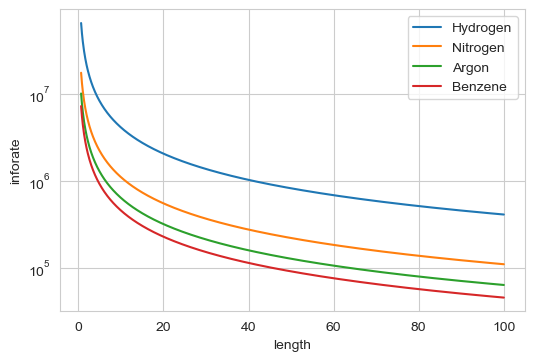

In [66]:
import scipy.stats as stats

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.integrate import quad
from scipy.integrate import simps
import math
from scipy.stats import truncnorm

def get_truncated_normal(mean=0, sd=1, low=0, upp=10):
    return truncnorm((low - mean) / sd, (upp - mean) / sd, loc=mean, scale=sd)

sns.set_style("whitegrid")
fig,ax=plt.subplots(dpi=100)
ax.set_xlabel("length")
ax.set_ylabel("inforate")

t=np.linspace(1.2e-5,1.4e-5,1000)
volt2=np.linspace(0,2000,1000)
length=np.linspace(0.632,100,1000)
width=np.zeros(length.size)
datarate=np.zeros(length.size)
mass=np.array([1,14,40,78])
elements=np.array(["Hydrogen","Nitrogen","Argon","Benzene"])


T=300
kB = 1.3806503e-23

s=0.0116
d=0.01
xolimit=s
R=8.314
ei=0
for mi in mass:
    m = mi*1.66e-27
    md=mi



    sgmav=math.sqrt((kB*T)/m)
    sgmax=319e-6
    vavg=math.sqrt((kB*8*T)/((np.pi)*m))

    v0=np.random.normal(vavg,sgmav,1000)
    xotr=get_truncated_normal(mean=xolimit/2, sd=sgmax, low=0, upp=0.0116)
    xo = xotr.rvs(1000)
#xo=np.random.normal(xolimit/2,sgmax,1000)
    q=1.67e-19

    for li in range(length.size):
    
        deltav0=65.96
        deltav1=-65.93
        deltav2=-1000
        Es=np.abs((deltav0-deltav1))/s
        Ed=np.abs((deltav1-deltav2))/d
        l=length[li]
#Es=11367.2
#Es=10
#Ed=93407
        qses=q*xo*Es

        qded=q*d*Ed



        u0j=(1/2)*m*v0*v0
        u0 = u0j*6.242e18
        u=u0j+qses+qded
        ue=(xo*Es)+(d*Ed)

#print(qses)
#print(qded)

        Ts=1.02*(((2*m)**0.5)/(Es))*((u0+qses)**0.5+((u0)**0.5))
        Ts-=1.02*(((2*m)**0.5)/Es)*((u0+qses)**0.5-((u0)**0.5))

        Td= 1.02*(((2*m)**0.5)/(Ed))*((u)**0.5-((u0+qses)**0.5))

        TD = 1.02*l*((2*m)**0.5)/(2*(u**0.5))
        Tu0s=Ts+Td+TD
        width[li]= 6*np.std(Tu0s)
        datarate[li]=1/width[li]
#Tu0sdata[:,0]=Tu0s

#plto=plt.hist(Tu0s,bins=100); #all info in tuple plto

#count,edges,plt=plt.hist(Tu0s,bins=[1.20e-15,1.25e-15,1.40e-15])
#sns.kdeplot(Tu0sdata[:,0]);
#sns.distplot(Tu0s);
    ax.semilogy(length,datarate,label=str(elements[ei]))
    plt.legend()
    ei=ei+1
plt.savefig("lengthup.pdf")


#tl=np.linspace(2e-16,3.8e-16,1000)
#plt.plot(tl,Tu0s)



In [ ]:
#lenwidth1000[2]=(6*np.std(Tu0s))
print(6*np.std(Tu0s))
#print(m+(2*(np.std(Tu0s))))
#lenwidth1000
(2.543e-6)-(2.543e-6)

In [ ]:

widthvolts=np.zeros(3)


In [ ]:
print(6*np.std(Tu0s))
widthvolts[0]=6*(np.std(Tu0s))
widthvolts